#Modify the Neural Network Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout
import matplotlib.pyplot as plt
import pandas as pd

#Load the IMDB Dataset

This dataset contains movie reviews labeled as positive or negative.

In [ ]:
max_features = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# Model configurations

This function allows flexibility in adjusting hidden units, activation functions, loss functions, and dropout.

In [ ]:
def create_model(hidden_units=64, activation='relu', loss='binary_crossentropy', dropout_rate=None):
    model = tf.keras.Sequential([
        Embedding(input_dim=max_features, output_dim=128),
        Flatten(),
        Dense(hidden_units, activation=activation)
    ])
    if dropout_rate:
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    return model



# Model variations

Experimenting with different hidden layers, activations, losses, and units.

In [ ]:
models = {
    "One Hidden Layer (64 units)": create_model(hidden_units=64),
    "Three Hidden Layers": tf.keras.Sequential([
        Embedding(input_dim=max_features, output_dim=128),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    "Tanh Activation + MSE Loss": create_model(hidden_units=64, activation='tanh', loss='mse'),
    "Dropout Regularization": create_model(hidden_units=64, dropout_rate=0.5),
    "Fewer Units (32)": create_model(hidden_units=32),
    "More Units (128)": create_model(hidden_units=128)
}



# Compile models where needed

Some models require explicit compilation after creation.

In [ ]:
models["Three Hidden Layers"].compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train and evaluate models

Training each model for 5 epochs and evaluating on the test set.

In [ ]:
def train_and_evaluate(model):
    model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
    val_accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
    test_accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
    return val_accuracy, test_accuracy


# Evaluate all models and collect results

Storing validation and test accuracies for comparison.

In [ ]:
results = {name: train_and_evaluate(model) for name, model in models.items()}

#Summarize results in a DataFrame

Creating a table for clear presentation of model performances.

In [ ]:
summary = pd.DataFrame([
    {"Model": name, "Validation Accuracy": val_acc, "Test Accuracy": test_acc}
    for name, (val_acc, test_acc) in results.items()
])

# Visualize the results

Bar chart comparing validation and test accuracies for each model.

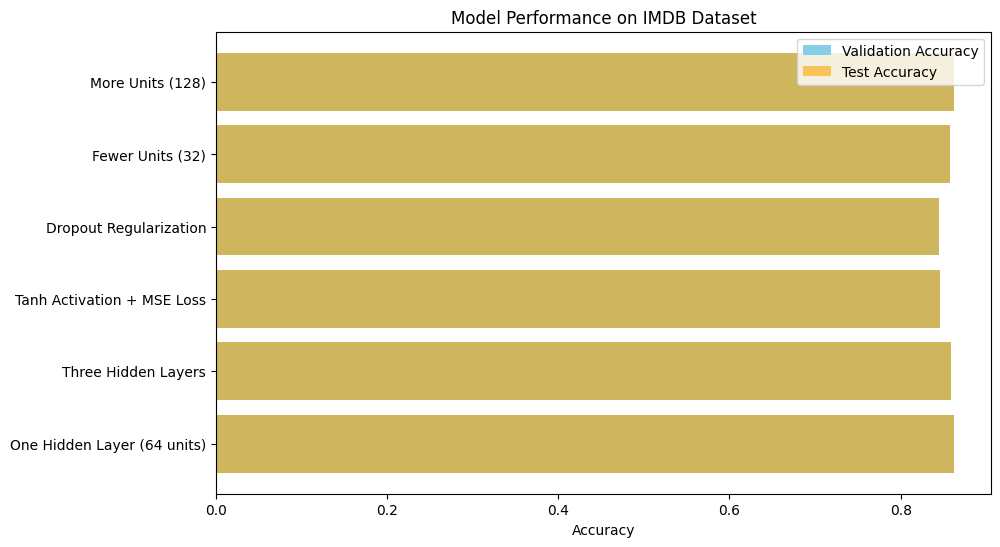

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(summary['Model'], summary['Validation Accuracy'], color='skyblue', label='Validation Accuracy')
plt.barh(summary['Model'], summary['Test Accuracy'], color='orange', alpha=0.6, label='Test Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Performance on IMDB Dataset')
plt.legend()
plt.show()


# Display summary

In [ ]:
print(summary)


                         Model  Validation Accuracy  Test Accuracy
0  One Hidden Layer (64 units)              0.86196        0.86196
1          Three Hidden Layers              0.85916        0.85916
2   Tanh Activation + MSE Loss              0.84616        0.84616
3       Dropout Regularization              0.84488        0.84488
4             Fewer Units (32)              0.85772        0.85772
5             More Units (128)              0.86240        0.86240
